# Crop Recommendation System

I found the dataset of car details from Kaggle

Link of the Dataset:https://www.kaggle.com/datasets/jiteshmd/crop-prediction-data

# About Dataset
Crop yield prediction is one of the challenging tasks in agriculture. It plays an essential role in decision making at global, regional, and field levels. The prediction of crop yield is based on soil, meteorological, environmental, and crop parameters.

Crop yield prediction systems provide for better planning and decision-making to increase production. The proposed system involves a prediction module based on data mining classification algorithm namely Random Forest used to forecast the yield of major crops based on historical data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("indiancrop_dataset.csv")

In [3]:
df.head()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Andaman and Nicobar,7000,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Andaman and Nicobar,5000,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Andaman and Nicobar,7000,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Andaman and Nicobar,7000,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Andaman and Nicobar,120000,Rice


In [4]:
df.tail()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,West Bengal,1000,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,West Bengal,800,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,West Bengal,560,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,West Bengal,1500,Coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,West Bengal,1400,Coffee


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N_SOIL       2200 non-null   int64  
 1   P_SOIL       2200 non-null   int64  
 2   K_SOIL       2200 non-null   int64  
 3   TEMPERATURE  2200 non-null   float64
 4   HUMIDITY     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   RAINFALL     2200 non-null   float64
 7   STATE        2200 non-null   object 
 8   CROP_PRICE   2200 non-null   int64  
 9   CROP         2200 non-null   object 
dtypes: float64(4), int64(4), object(2)
memory usage: 172.0+ KB


The DataFrame has a total of 2200 entries and all columns have 2200 non-null values, indicating that there are no missing values in the dataset. The memory usage of the DataFrame is approximately 172.0 KB.

The data types of the columns include integers (N_SOIL, P_SOIL, K_SOIL, CROP_PRICE), floating-point numbers (TEMPERATURE, HUMIDITY, ph, RAINFALL), and objects (STATE, CROP).

In [6]:
df.describe()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,CROP_PRICE
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,2689.228182
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,3710.361267
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,2.000000
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,950.000000
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,1825.000000
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,3500.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,120000.000000


N_SOIL: Mean = 50.55, Min = 0, Max = 140.

P_SOIL: Mean = 53.36, Min = 5, Max = 145.

K_SOIL: Mean = 48.15, Min = 5, Max = 205.

TEMPERATURE: Mean = 25.62, Min = 8.83, Max = 43.68.

HUMIDITY: Mean = 71.48, Min = 14.26, Max = 99.98.

ph: Mean = 6.47, Min = 3.50, Max = 9.94.

RAINFALL: Mean = 103.46, Min = 20.21, Max = 298.56.

CROP_PRICE: Mean = 2689.23, Min = 2, Max = 120,000.


In [7]:
df.nunique()

N_SOIL          137
P_SOIL          117
K_SOIL           73
TEMPERATURE    2200
HUMIDITY       2200
ph             2200
RAINFALL       2200
STATE            26
CROP_PRICE      502
CROP             22
dtype: int64

# now lets clean the data

In [8]:
df.isnull().sum()

N_SOIL         0
P_SOIL         0
K_SOIL         0
TEMPERATURE    0
HUMIDITY       0
ph             0
RAINFALL       0
STATE          0
CROP_PRICE     0
CROP           0
dtype: int64

#### There is no null values present i this dataset

# Now we do EDA

In [9]:
num_col=df.select_dtypes(['float','int'])

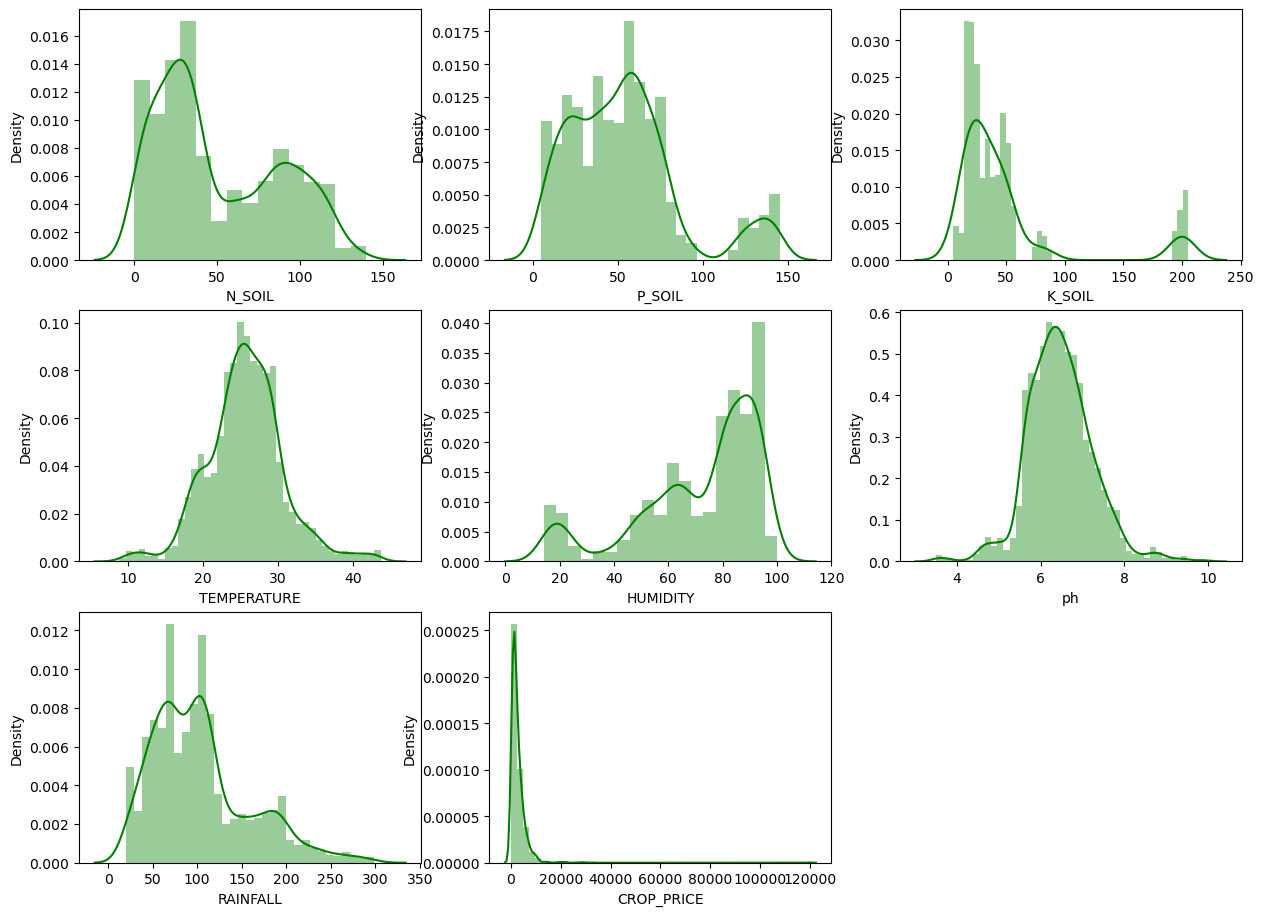

In [10]:
plt.figure(figsize= (15,15))
count=1
for i in num_col:
    
    plt.subplot(4,3,count)
    sns.distplot(num_col[i],color='green')
    count+=1
plt.show()


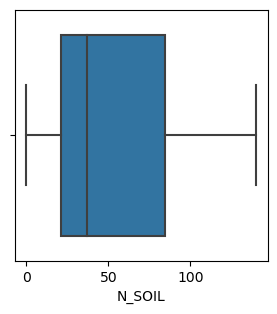

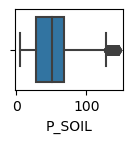

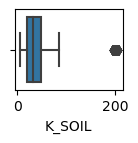

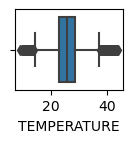

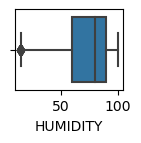

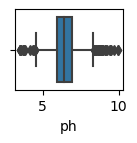

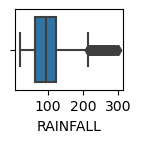

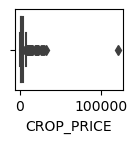

In [11]:
plt.figure(figsize=(15,15))
count=1
for i in num_col:
    plt.subplot(4,4,count)
    sns.boxplot(num_col[i])
    count+=1
    plt.show()
    

<AxesSubplot:ylabel='CROP'>

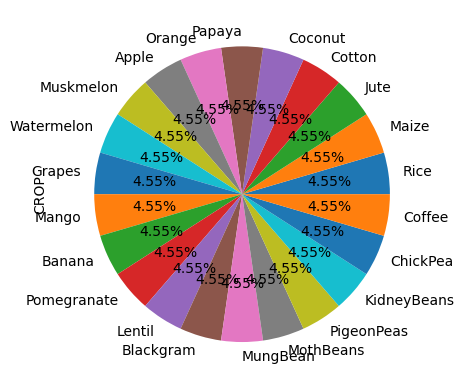

In [12]:
df['CROP'].value_counts().plot(kind='pie',autopct='%.2f%%')

#### all the crops are uniformly distributed in this dataset

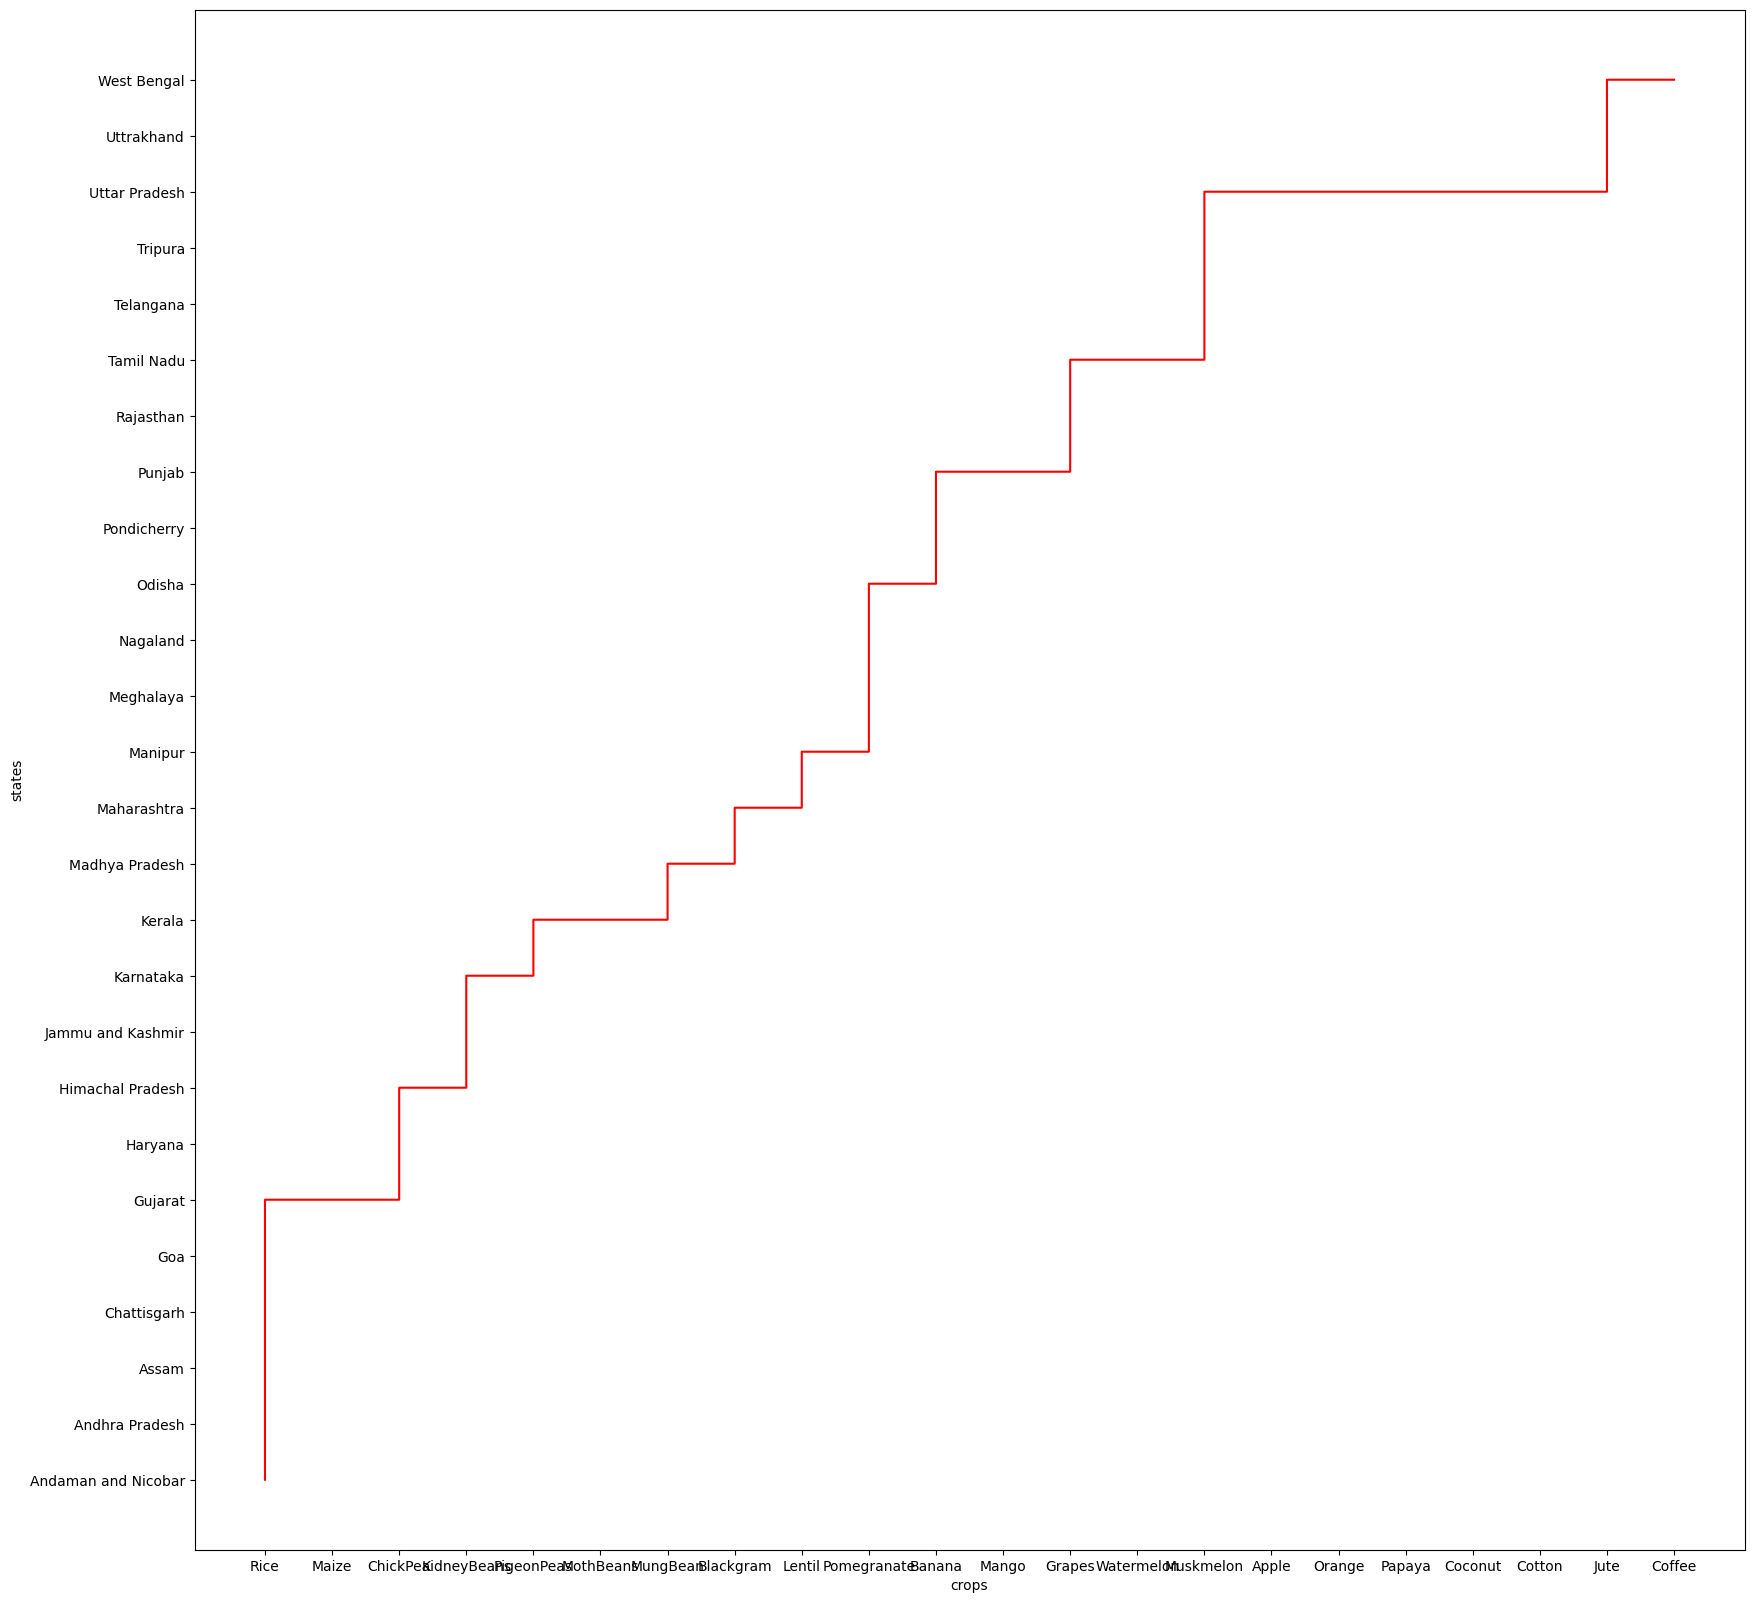

In [13]:
plt.figure(figsize=(20,20))
plt.plot(df['CROP'],df['STATE'],color='red')
plt.xlabel('crops')
plt.ylabel('states')
plt.show()

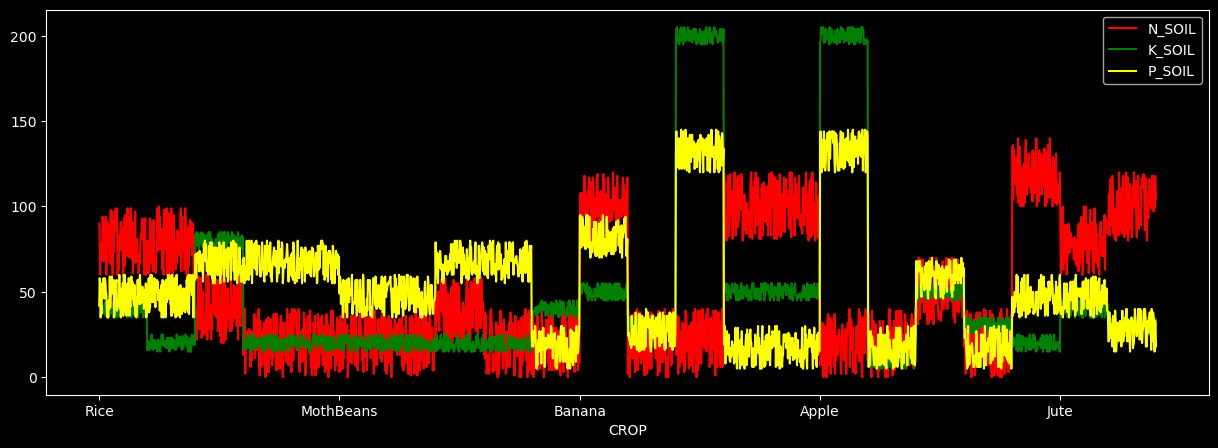

In [14]:
plt.style.use('dark_background')
fig,ax = plt.subplots(figsize=(15,5))
df.plot(ax=ax ,x='CROP',y='N_SOIL',color='red')
df.plot(ax=ax ,x="CROP",y='K_SOIL',color='green')
df.plot(ax=ax , x="CROP",y="P_SOIL",color='yellow')
plt.show()

In [15]:
df.nunique()

N_SOIL          137
P_SOIL          117
K_SOIL           73
TEMPERATURE    2200
HUMIDITY       2200
ph             2200
RAINFALL       2200
STATE            26
CROP_PRICE      502
CROP             22
dtype: int64

In [16]:
df.groupby('CROP')['N_SOIL'].max()

CROP
Apple           40
Banana         120
Blackgram       60
ChickPea        60
Coconut         40
Coffee         120
Cotton         140
Grapes          40
Jute           100
KidneyBeans     40
Lentil          40
Maize          100
Mango           40
MothBeans       40
MungBean        40
Muskmelon      120
Orange          40
Papaya          70
PigeonPeas      40
Pomegranate     40
Rice            99
Watermelon     120
Name: N_SOIL, dtype: int64

#### cotton required highest nitrogen in soil i.e 140

In [17]:
df.groupby('CROP')['K_SOIL'].max()

CROP
Apple          205
Banana          55
Blackgram       25
ChickPea        85
Coconut         35
Coffee          35
Cotton          25
Grapes         205
Jute            45
KidneyBeans     25
Lentil          25
Maize           25
Mango           35
MothBeans       25
MungBean        25
Muskmelon       55
Orange          15
Papaya          55
PigeonPeas      25
Pomegranate     45
Rice            45
Watermelon      55
Name: K_SOIL, dtype: int64

#### apple and grapes required highest potassium i.e 250

In [18]:
df.groupby('CROP')['P_SOIL'].max()

CROP
Apple          145
Banana          95
Blackgram       80
ChickPea        80
Coconut         30
Coffee          40
Cotton          60
Grapes         145
Jute            60
KidneyBeans     80
Lentil          80
Maize           60
Mango           40
MothBeans       60
MungBean        60
Muskmelon       30
Orange          30
Papaya          70
PigeonPeas      80
Pomegranate     30
Rice            60
Watermelon      30
Name: P_SOIL, dtype: int64

#### apple and grapes required highest phosphurs i.e 145

In [19]:
temp=df.groupby("CROP")['TEMPERATURE'].max().reset_index()

In [20]:
temp.max()

CROP           Watermelon
TEMPERATURE     43.675493
dtype: object

#### watermelon required highest temperture i.e 43

<AxesSubplot:>

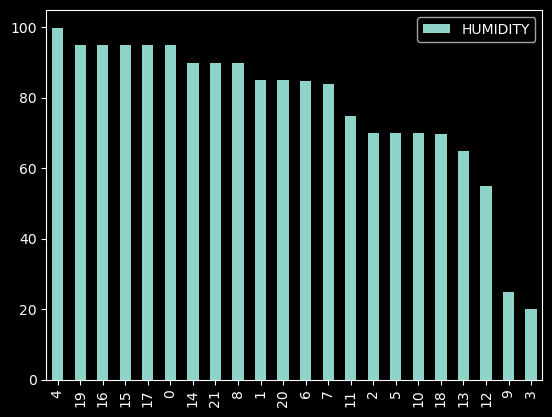

In [21]:

humidty=df.groupby("CROP")['HUMIDITY'].max().reset_index()
humidty.sort_values('HUMIDITY',ascending=False).plot(kind='bar')

#### watermelon required highest Coconut i.e 99

<AxesSubplot:>

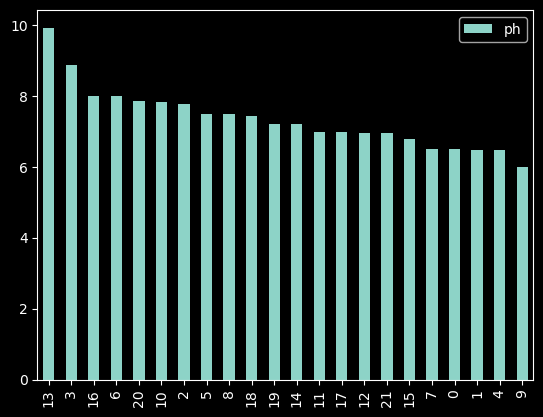

In [22]:
Ph=df.groupby("CROP")['ph'].max().reset_index()
Ph.sort_values('ph',ascending=False).plot(kind='bar')

#### MothBeans required highest ph value i.e 9.93

In [23]:
df.nunique()

N_SOIL          137
P_SOIL          117
K_SOIL           73
TEMPERATURE    2200
HUMIDITY       2200
ph             2200
RAINFALL       2200
STATE            26
CROP_PRICE      502
CROP             22
dtype: int64

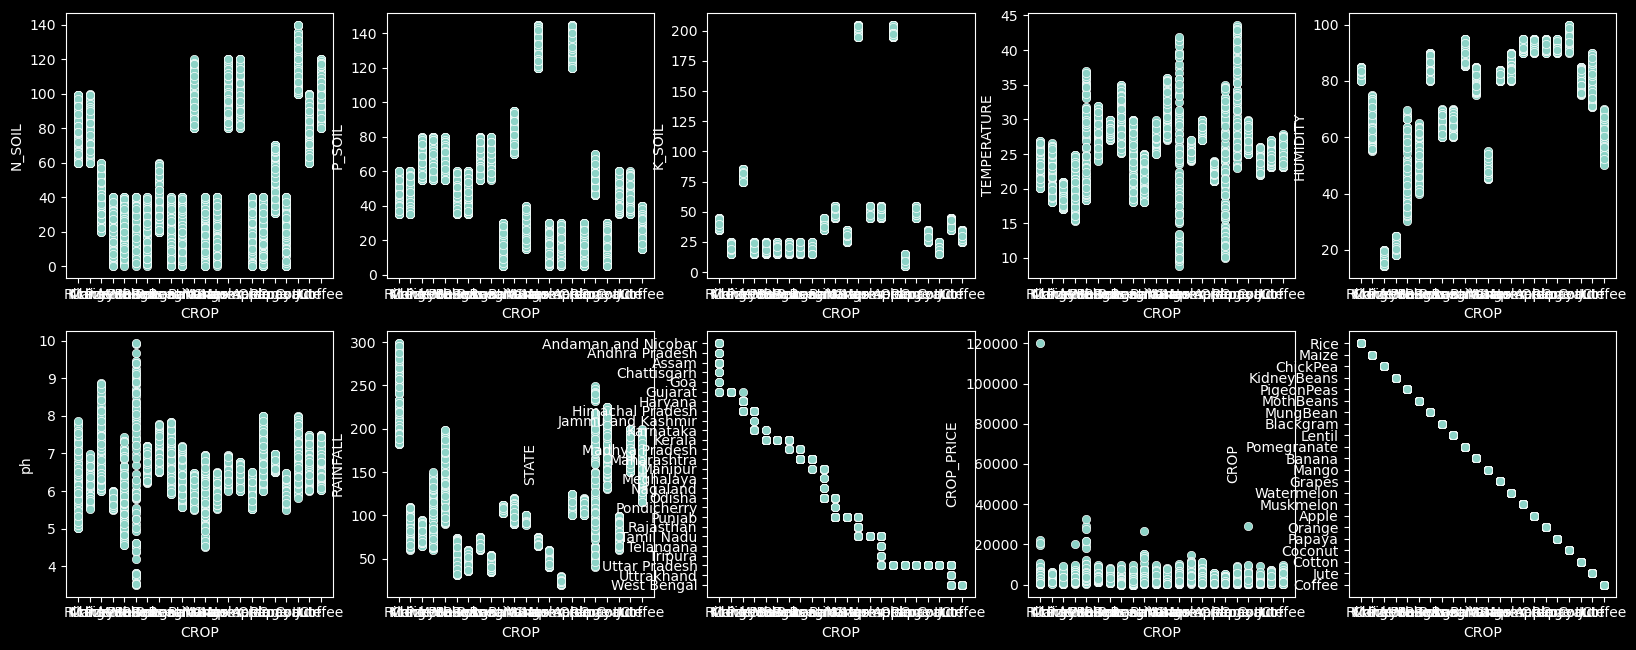

In [24]:
plt.figure(figsize=(20,20))
count=1
for i in df:
    plt.subplot(5,5,count)
    sns.scatterplot(x=df['CROP'],y=df[i])
    count+=1
plt.show()

<AxesSubplot:>

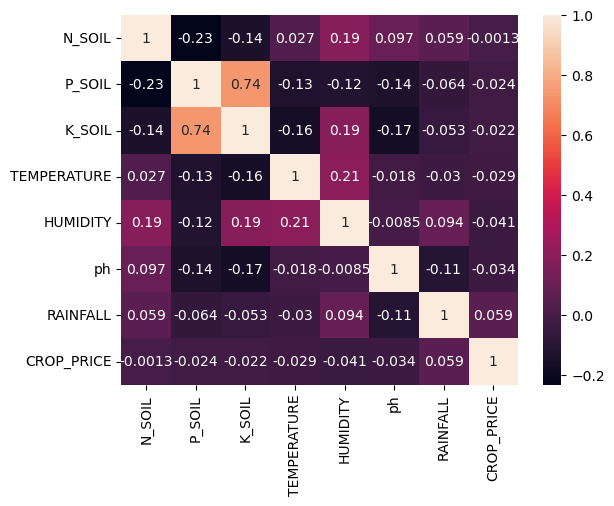

In [25]:
plt.style.use('default')
sns.heatmap(df.corr(),annot=True)

In [26]:
df['CROP'].unique()

array(['Rice', 'Maize', 'ChickPea', 'KidneyBeans', 'PigeonPeas',
       'MothBeans', 'MungBean', 'Blackgram', 'Lentil', 'Pomegranate',
       'Banana', 'Mango', 'Grapes', 'Watermelon', 'Muskmelon', 'Apple',
       'Orange', 'Papaya', 'Coconut', 'Cotton', 'Jute', 'Coffee'],
      dtype=object)

# encoding

In [27]:
crop_dict = {
    'Rice': 1,
    'Maize': 2,
    'Jute': 3,
    'Cotton': 4,
    'Coconut': 5,
    'Papaya': 6,
    'Orange': 7,
    'Apple': 8,
    'Muskmelon': 9,
    'Watermelon': 10,
    'Grapes': 11,
    'Mango': 12,
    'Banana': 13,
    'Pomegranate': 14,
    'Lentil': 15,
    'Blackgram': 16,
    'MungBean': 17,
    'MothBeans': 18,
    'PigeonPeas': 19,
    'KidneyBeans': 20,
    'ChickPea': 21,
    'Coffee': 22
}
df['CROP'] = df['CROP'].map(crop_dict)

In [28]:
df.head()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Andaman and Nicobar,7000,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Andaman and Nicobar,5000,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Andaman and Nicobar,7000,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Andaman and Nicobar,7000,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Andaman and Nicobar,120000,1


In [29]:
corr=df.corr()['CROP'].reset_index()
corr.sort_values('CROP',ascending=False)

,index,CROP
8,CROP,1.000000
1,P_SOIL,0.109993
7,CROP_PRICE,0.059201
5,ph,0.057527
3,TEMPERATURE,-0.031383
2,K_SOIL,-0.089209
6,RAINFALL,-0.311053
0,N_SOIL,-0.317076
4,HUMIDITY,-0.640925


<AxesSubplot:xlabel='CROP'>

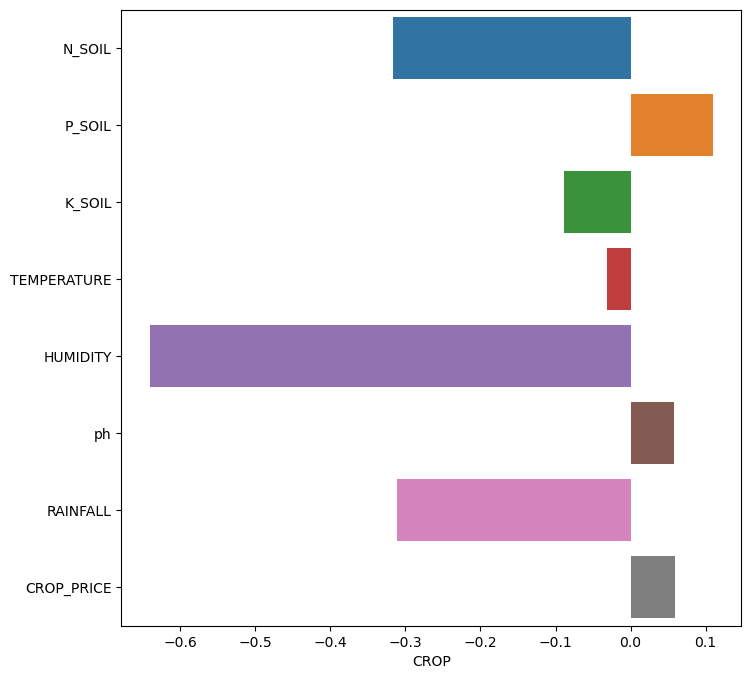

In [30]:
corelation = pd.DataFrame(df.corr())
corelation = pd.DataFrame(corelation['CROP'])
indices_to_remove = ['CROP']
corelation = corelation.drop(indices_to_remove)
plt.figure(figsize=(8,8))
sns.barplot(x=corelation['CROP'],y=corelation.index)

# feature selection

In [31]:
X=df.drop(['CROP','STATE'],axis=1)

In [32]:
X

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,CROP_PRICE
0,90,42,43,20.879744,82.002744,6.502985,202.935536,7000
1,85,58,41,21.770462,80.319644,7.038096,226.655537,5000
2,60,55,44,23.004459,82.320763,7.840207,263.964248,7000
3,74,35,40,26.491096,80.158363,6.980401,242.864034,7000
4,78,42,42,20.130175,81.604873,7.628473,262.717340,120000
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,1000
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,800
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,560
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,1500


In [33]:
y=df['CROP']

In [34]:
y

0        1
1        1
2        1
3        1
4        1
        ..
2195    22
2196    22
2197    22
2198    22
2199    22
Name: CROP, Length: 2200, dtype: int64

# train and test

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42)

In [38]:
Xtrain.shape,Xtest.shape

((1760, 8), (440, 8))

In [39]:
ytrain.shape,ytest.shape

((1760,), (440,))

# scaling

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
se=StandardScaler()

In [42]:
Xtrain=se.fit_transform(Xtrain)
Xtest=se.fit_transform(Xtest)

# Training models

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve

In [57]:
knn=KNeighborsClassifier(n_neighbors=3)
lr=LogisticRegression()
dt=DecisionTreeClassifier()
ra=RandomForestClassifier()
ad=AdaBoostClassifier()
svm=SVC(probability=True)
gau=GaussianNB()
bag=BaggingClassifier()
Gr=GradientBoostingClassifier()


In [87]:
Training_score= []
Testing_score= []
def model_building(model):
    model.fit(Xtrain, ytrain)
    ytrain_pred= model.predict(Xtrain)
    ytest_pred= model.predict(Xtest)
    a= accuracy_score(ytrain, ytrain_pred)
    b= accuracy_score(ytest, ytest_pred)
    Training_score.append(a)
    Testing_score.append(b)
    print(model)
    print("Train Data\n", accuracy_score(ytrain,ytrain_pred))
    print("Test Data\n", accuracy_score(ytest,ytest_pred))

In [88]:
model_building(knn)


KNeighborsClassifier(n_neighbors=3)
Train Data
 0.9880681818181818
Test Data
 0.9409090909090909


In [89]:
model_building(lr)

LogisticRegression()
Train Data
 0.9772727272727273
Test Data
 0.9477272727272728


In [90]:
model_building(dt)

DecisionTreeClassifier()
Train Data
 1.0
Test Data
 0.9431818181818182


In [91]:
model_building(ra)

RandomForestClassifier()
Train Data
 1.0
Test Data
 0.9795454545454545


In [92]:
model_building(ad)

AdaBoostClassifier()
Train Data
 0.19204545454545455
Test Data
 0.1409090909090909


In [93]:
model_building(svm)

SVC(probability=True)
Train Data
 0.9875
Test Data
 0.9659090909090909


In [94]:
model_building(gau)

GaussianNB()
Train Data
 0.9914772727272727
Test Data
 0.9795454545454545


In [95]:
model_building(bag)

BaggingClassifier()
Train Data
 0.9988636363636364
Test Data
 0.9431818181818182


In [96]:
model_building(Gr)

GradientBoostingClassifier()
Train Data
 1.0
Test Data
 0.9295454545454546


In [97]:
Models= ["k-Nearest Neighbors","Logistic Regression" ,"Decision Tree Classifier", "Random forest Classifier" ,
        "Ada-Boosting Classifier","svm","GaussianNB","Bagging Classifier", "Gradiant- Bossting Classifier"]

In [98]:
new_df = pd.DataFrame({"Algorithms":Models,
                   "Training Score":Training_score,
                   "Testing Score":Testing_score,})

In [99]:
new_df

,Algorithms,Training Score,Testing Score
0,k-Nearest Neighbors,0.988068,0.940909
1,Logistic Regression,0.977273,0.947727
2,Decision Tree Classifier,1.000000,0.943182
3,Random forest Classifier,1.000000,0.979545
4,Ada-Boosting Classifier,0.192045,0.140909
5,svm,0.987500,0.965909
6,GaussianNB,0.991477,0.979545
7,Bagging Classifier,0.998864,0.943182
8,Gradiant- Bossting Classifier,1.000000,0.929545


#### from above algorithm we consider only two algorithm to do hypertunning

 Random Forest Classifier: It achieved a perfect training score of 1.000 and a high testing score of 0.980, indicating excellent performance on both the training and testing datasets.

GaussianNB (Gaussian Naive Bayes): It achieved a training score of 0.991 and a testing score of 0.980, indicating a high level of accuracy and strong performance on both the training and testing datasets.

These two algorithms, Random Forest Classifier and GaussianNB, demonstrate the best performance among the listed options based on the provided scores.

# hypertunning

# Random forest

In [100]:
from sklearn.model_selection import RandomizedSearchCV

In [101]:
ra=RandomForestClassifier()

In [102]:
random_forest_params = {
    'n_estimators': [25,50,75,100],
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'min_samples_split': [2, 5, 10],
    'criterion': ["gini", "entropy"],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}


In [103]:
ra_reg=RandomizedSearchCV(ra,param_distributions=random_forest_params,random_state=42,scoring='accuracy',cv=5,n_jobs=-1)

In [104]:
ra_reg.fit(Xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 5, 10, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [5, 10, 20, 50,
                                                             100],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [25, 50, 75, 100]},
                   random_state=42, scoring='accuracy')

In [105]:
ra_reg.best_params_

{'n_estimators': 50,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 10,
 'criterion': 'entropy',
 'bootstrap': False}

In [106]:
ra_reg.best_score_

0.99375

In [130]:
model_building(ra_reg)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 5, 10, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [5, 10, 20, 50,
                                                             100],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [25, 50, 75, 100]},
                   random_state=42, scoring='accuracy')
Train Data
 0.9988636363636364
Test Data
 0.975


# gaussianNB

In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

In [109]:
gau=GaussianNB()

In [110]:
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],
    'priors': [None, [0.2, 0.8], [0.5, 0.5], [0.8, 0.2]]
}


In [111]:
gau_reg=GridSearchCV(gau,param_grid=param_grid,cv=5,n_jobs=-1,scoring='accuracy')

In [112]:
gau_reg.fit(Xtrain,ytrain)

GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'priors': [None, [0.2, 0.8], [0.5, 0.5], [0.8, 0.2]],
                         'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             scoring='accuracy')

In [113]:
gau_reg.best_params_

{'priors': None, 'var_smoothing': 1e-09}

In [114]:
gau_reg.best_score_

0.9897727272727274

In [123]:
model_building(gau_reg)

GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'priors': [None, [0.2, 0.8], [0.5, 0.5], [0.8, 0.2]],
                         'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             scoring='accuracy')
Train Data
 0.9914772727272727
Test Data
 0.9795454545454545


In [129]:
model_building(ra_reg)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 5, 10, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [5, 10, 20, 50,
                                                             100],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [25, 50, 75, 100]},
                   random_state=42, scoring='accuracy')
Train Data
 0.9988636363636364
Test Data
 0.9772727272727273


Here's a comparison of the performance and considerations:

GaussianNB:

Training Data Accuracy: 0.9915
Testing Data Accuracy: 0.9795
RandomForestClassifier:

Training Data Accuracy: 0.9989
Testing Data Accuracy: 0.9773
Based on the accuracy scores, GaussianNB slightly outperforms RandomForestClassifier on both the training and testing datasets. Furthermore, GaussianNB shows a smaller difference between the training and testing scores, suggesting lower overfitting compared to RandomForestClassifier.

**Considering the balance between performance and overfitting, GaussianNB appears to be the better algorithm in this scenario.**

In [131]:
import pickle

In [132]:
crop_model=pickle.dump(gau_reg,open('cropmodeling.pkl','wb'))

In [134]:
scaling=pickle.dump(se,open('scalingC.pkl','wb'))